In [1]:
!top

=top - 17:26:04 up 4 min,  0 users,  load average: 1.11, 0.62, 0.28
Tasks:  17 total,   2 running,  14 sleeping,   0 stopped,   1 zombie
%Cpu(s): 60.0 us, 40.0 sy,  0.0 ni,  0.0 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
MiB Mem :  12979.0 total,   6951.3 free,    971.4 used,   5056.3 buff/cache
MiB Swap:      0.0 total,      0.0 free,      0.0 used.  11688.0 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND                      
   1148 root      20   0  909292 186800  33632 R 120.0   1.4   0:04.46 node                         
      1 root      20   0    1076      8      0 S   0.0   0.0   0:00.01 docker-init                  
      7 root      20   0  828980  49948  33720 S   0.0   0.4   0:00.63 node                         
     15 root      20   0    7376   3380   3080 S   0.0   0.0   0:00.12 oom_monitor.sh               
     17 root      20   0    7376   1868   1584 S   0.0   0.0   0:00.00 run.sh                       
     19 root      20   

In [ ]:
!nvidia-smi

Sat Nov  2 14:20:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              27W /  70W |    301MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

In [3]:
# Definición de una red neuronal simple
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Función para medir el tiempo de entrenamiento
def train_network(device):
    # Crear datos sintéticos
    x = torch.randn(10000, 1000).to(device)
    y = torch.randint(0, 10, (10000,)).to(device)

    # Inicializar la red, función de pérdida y optimizador
    model = SimpleNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Entrenamiento simple
    start_time = time.time()
    for epoch in range(5):  # 5 épocas para demostrar
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
    end_time = time.time()

    return end_time - start_time

# Comparación de tiempo en CPU vs GPU
device_cpu = torch.device("cpu")
time_cpu = train_network(device_cpu)
print(f"Tiempo de entrenamiento en CPU: {time_cpu:.2f} segundos")

if torch.cuda.is_available():
    device_gpu = torch.device("cuda")
    time_gpu = train_network(device_gpu)
    print(f"Tiempo de entrenamiento en GPU: {time_gpu:.2f} segundos")
else:
    print("No se encontró una GPU disponible.")


Tiempo de entrenamiento en CPU: 1.79 segundos
Tiempo de entrenamiento en GPU: 0.41 segundos


In [ ]:
model = SimpleNN()  # Crea una instancia de tu modelo

print(model)  # Imprime la arquitectura de la red

SimpleNN(
  (fc1): Linear(in_features=1000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=dee859b82d197f15c1d5577a3c3a731a9c2cf1421848b5ff809460ada744c4f4
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


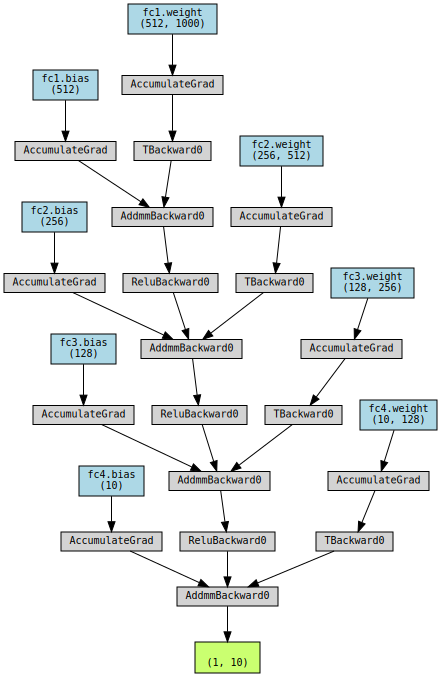

In [ ]:
from torchviz import make_dot

# Crea datos de entrada de muestra (ajusta la forma según tu modelo)
x = torch.randn(1, 1000)

# Obtén la salida del modelo (y el gráfico computacional)
y = model(x)

# Genera el gráfico
dot = make_dot(y, params=dict(model.named_parameters()))

# Muestra el gráfico
dot.render("neural_network_graph", format="png")  # Guarda como PNG
dot # Muestra el gráfico en la salida de la celda
